In [9]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

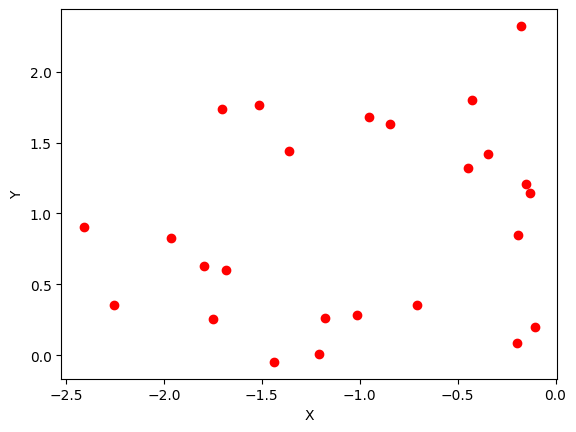

In [10]:
x = np.load("circle_data_1.npy") # \in \mathcal{R}^{2}
plt.figure(1)
plt.scatter(x[0], x[1], color = 'red', marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")

In [11]:
c = np.array([-1.06211003, 0.99475605])   # LS center
R = 0.97887041                            # LS radius
lam = 1.0                                 # λ₀ = 1
eps = 1e-6                                # stopping tolerance
max_iter = 100
eps_norm = 1e-12

In [12]:
grad_norms = []

print(f"{'Iter':>4} | {'λ':>8} | {'Cost':>12} | {'||g||':>10}")
print("-"*46)


for k in range(max_iter):
    # residuals: r_n = ||c - x_n|| - R
    d = np.sqrt((c[0] - x[0])**2 + (c[1] - x[1])**2)
    r = d - R

    # Jacobian: J_n = [ (c1 - x1n)/d_n, (c2 - x2n)/d_n, -1 ]
    # handle very small d by replacing with eps_norm
    d_safe = np.where(d < eps_norm, eps_norm, d)
    J = np.vstack([(c[0] - x[0]) / d_safe,
                   (c[1] - x[1]) / d_safe,
                   -np.ones_like(d_safe)]).T

    g = J.T @ r
    grad_norm = np.linalg.norm(g)
    grad_norms.append(grad_norm)
    f_old = np.sum(r**2)

    print(f"{k:4d} | {lam:8.3e} | {f_old:12.6e} | {grad_norm:10.3e}")

    if grad_norm < eps:
        break

    # Solve (J^T J + lambda I) delta = -J^T r
    H = J.T @ J + lam * np.eye(3)
    delta = np.linalg.lstsq(H, -g, rcond=None)[0]

    c_new = c + delta[:2]
    R_new = R + delta[2]

    # compute new cost
    d_new = np.sqrt((c_new[0] - x[0])**2 + (c_new[1] - x[1])**2)
    r_new = d_new - R_new
    f_new = np.sum(r_new**2)

    if f_new < f_old:           # valid step
        c, R = c_new, R_new
        lam *= 0.7
    else:                       # null step
        lam *= 2.0

print("-"*46)
print("Final LM center:", c)
print("Final LM radius:", R)

Iter |        λ |         Cost |      ||g||
----------------------------------------------
   0 | 1.000e+00 | 1.599213e+00 |  9.494e-01
   1 | 7.000e-01 | 1.550781e+00 |  5.050e-02
   2 | 4.900e-01 | 1.550585e+00 |  3.231e-03
   3 | 3.430e-01 | 1.550584e+00 |  3.100e-04
   4 | 2.401e-01 | 1.550584e+00 |  4.432e-05
   5 | 1.681e-01 | 1.550584e+00 |  6.345e-06
   6 | 1.176e-01 | 1.550584e+00 |  8.697e-07
----------------------------------------------
Final LM center: [-1.05996716  0.9523476 ]
Final LM radius: 0.9442665370892928


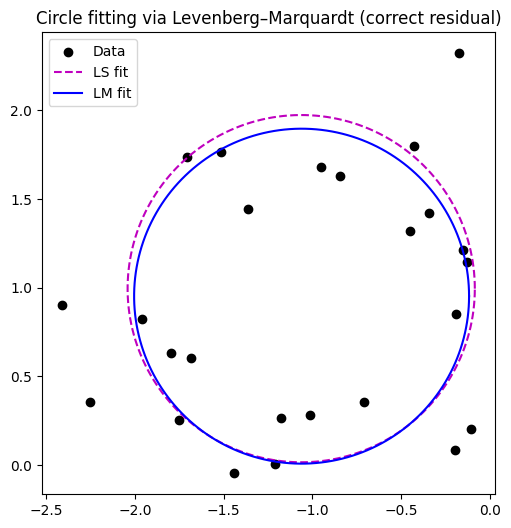

In [13]:
#Plot circles
theta = np.linspace(0, 2*np.pi, 200)
circle_ls_x = -1.06211003 + 0.97887041 * np.cos(theta)
circle_ls_y =  0.99475605 + 0.97887041 * np.sin(theta)
circle_lm_x = c[0] + R * np.cos(theta)
circle_lm_y = c[1] + R * np.sin(theta)

plt.figure(figsize=(6,6))
plt.scatter(x[0], x[1], color='black', label='Data')
plt.plot(circle_ls_x, circle_ls_y, 'm--', label='LS fit')
plt.plot(circle_lm_x, circle_lm_y, 'b', label='LM fit')
plt.gca().set_aspect('equal')
plt.legend()
plt.title("Circle fitting via Levenberg–Marquardt (correct residual)")
plt.show()

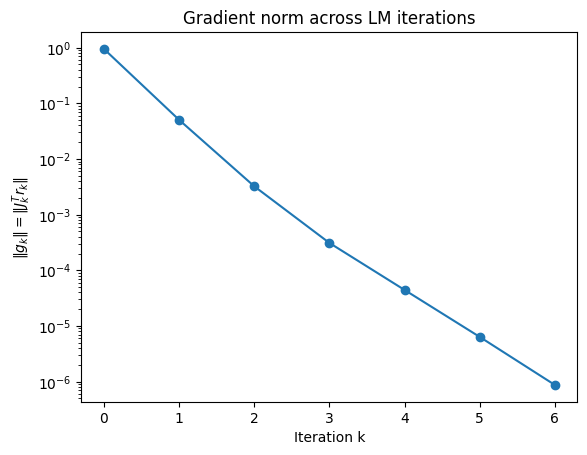

In [14]:
#Plot gradient norm
plt.semilogy(grad_norms, 'o-')
plt.xlabel("Iteration k")
plt.ylabel(r"$\|g_k\| = \|J_k^T r_k\|$")
plt.title("Gradient norm across LM iterations")
plt.show()